# Time for the showcase showdown!
Can we use bayesians statistics to help win the showcase showdown? In other words, can we use it for something other than the Monty Hall problem? Let's find out!

In [1]:
from __future__ import print_function, division

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np

import sys
import os

tb_dir = "/home/pi/Programming/ThinkBayes2/"

sys.path.append(os.path.abspath(tb_dir + "thinkbayes2/"))
sys.path.append(os.path.abspath(tb_dir + "scripts/"))
sys.path.append(os.path.abspath(tb_dir + "thinkplot/"))

#from thinkbayes2 import Pmf, Cdf, Suite, Beta
import thinkbayes2
import thinkplot
import price

Using the price.py set of classes and methods, we can create some players and feed them the prices of the showcase showdowns of 2011 & 2012. 

In [5]:
data_dir = "/home/pi/Programming/ThinkBayes2/data/"
player1, player2 = price.MakePlayers(data_dir)

Now we can get a look at the distribtuion of these prices using methods from the player class.

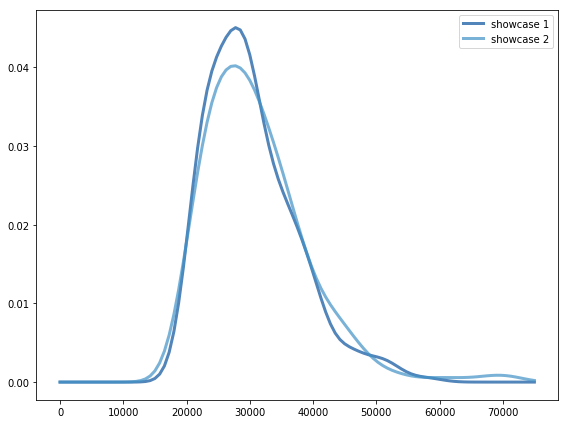

In [6]:
thinkplot.Clf()
thinkplot.PrePlot(num=2)
pmf1 = player1.PmfPrice()
pmf1.label = 'showcase 1'
pmf2 = player2.PmfPrice()
pmf2.label = 'showcase 2'
thinkplot.Pdfs([pmf1, pmf2])
thinkplot.decorate(legend=True)